## Feature Engineering with Linear Regression: Applied to the Ames Housing Data

Using the Ames Housing Data:

In this notebook, we will build some linear regression models to predict housing prices from this data. In particular, we will set out to improve on a baseline set of features via **feature engineering**: deriving new features from our existing data. Feature engineering often makes the difference between a weak model and a strong one.

We will use visual exploration, domain understanding, and intuition to construct new features that will be useful later in the course as we turn to prediction.

**Objectives**

> 1. Simple EDA
> 2. One-hot Encoding variables
> 3. Log transformation for skewed variables
> 4. Pair plot for features
> 5. Basic feature engineering: adding polynomial and interaction terms
> 6. Feature engineering: categories and features derived from category aggregates

## 1. Simple EDA


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/dataset

/content/gdrive/MyDrive/dataset


In [ ]:
import pandas as pd
import seaborn as sns
sns.set()

#### Load the Data, Examine and Explore


In [ ]:
## Load in the Ames Housing Data
df = pd.read_csv('Ames_Housing_Data1.tsv', sep='\t')

In [ ]:
## Examine the columns, look at missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2931 non-null   int64  
 1   PID              2931 non-null   int64  
 2   MS SubClass      2931 non-null   int64  
 3   MS Zoning        2931 non-null   object 
 4   Lot Frontage     2441 non-null   float64
 5   Lot Area         2931 non-null   int64  
 6   Street           2931 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2931 non-null   object 
 9   Land Contour     2931 non-null   object 
 10  Utilities        2931 non-null   object 
 11  Lot Config       2931 non-null   object 
 12  Land Slope       2931 non-null   object 
 13  Neighborhood     2931 non-null   object 
 14  Condition 1      2931 non-null   object 
 15  Condition 2      2931 non-null   object 
 16  Bldg Type        2931 non-null   object 
 17  House Style   

In [ ]:
# This is recommended by the data set author to remove a few outliers

df = df.loc[df['Gr Liv Area'] <= 4000,:]
print("Number of rows in the data:", df.shape[0])
print("Number of columns in the data:", df.shape[1])
data = df.copy() # Keep a copy our original data

Number of rows in the data: 2926
Number of columns in the data: 82


In [ ]:
# A quick look at the data:
df.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      1  526301100           20        RL         141.0     31770   Pave   
2      2  526350040           20        RH          80.0     11622   Pave   
3      3  526351010           20        RL          81.0     14267   Pave   
4      4  526353030           20        RL          93.0     11160   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
2   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
3   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
4   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0       5    2010       WD           Normal     215000  
1        0       5    2010       WD           Normal     215000  
2        0       6    2010       WD           Normal     105000  
3    12500       6    2010       WD           Normal     172000  
4        0       4    2010       WD           Normal     244000  

[5 rows x 82 columns]

We're going to first do some basic data cleaning on this data:

* Converting categorical variables to dummies
* Making skew variables symmetric

### One-hot encoding for dummy variables:


In [ ]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = df.dtypes[df.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields
df[one_hot_encode_cols].head().T

<ipython-input-16-3e19350dadf3>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  one_hot_encode_cols = df.dtypes[df.dtypes == np.object]  # filtering by string categoricals


0        1        2        3        4
MS Zoning            RL       RL       RH       RL       RL
Street             Pave     Pave     Pave     Pave     Pave
Alley               NaN      NaN      NaN      NaN      NaN
Lot Shape           IR1      IR1      Reg      IR1      Reg
Land Contour        Lvl      Lvl      Lvl      Lvl      Lvl
Utilities        AllPub   AllPub   AllPub   AllPub   AllPub
Lot Config       Corner   Corner   Inside   Corner   Corner
Land Slope          Gtl      Gtl      Gtl      Gtl      Gtl
Neighborhood      NAmes    NAmes    NAmes    NAmes    NAmes
Condition 1        Norm     Norm    Feedr     Norm     Norm
Condition 2        Norm     Norm     Norm     Norm     Norm
Bldg Type          1Fam     1Fam     1Fam     1Fam     1Fam
House Style      1Story   1Story   1Story   1Story   1Story
Roof Style          Hip      Hip    Gable      Hip      Hip
Roof Matl       CompShg  CompShg  CompShg  CompShg  CompShg
Exterior 1st    BrkFace  BrkFace  VinylSd  Wd Sdng  BrkFace
Exterior 2nd    Plywood  Plywood  VinylSd  Wd Sdng  BrkFace
Mas Vnr Type      Stone    Stone     None  BrkFace     None
Exter Qual           TA       TA       TA       TA       Gd
Exter Cond           TA       TA       TA       TA       TA
Foundation       CBlock   CBlock   CBlock   CBlock   CBlock
Bsmt Qual            TA       TA       TA       TA       TA
Bsmt Cond            Gd       Gd       TA       TA       TA
Bsmt Exposure        Gd       Gd       No       No       No
BsmtFin Type 1      BLQ      BLQ      Rec      ALQ      ALQ
BsmtFin Type 2      Unf      Unf      LwQ      Unf      Unf
Heating            GasA     GasA     GasA     GasA     GasA
Heating QC           Fa       Fa       TA       TA       Ex
Central Air           Y        Y        Y        Y        Y
Electrical        SBrkr    SBrkr    SBrkr    SBrkr    SBrkr
Kitchen Qual         TA       TA       TA       Gd       Ex
Functional          Typ      Typ      Typ      Typ      Typ
Fireplace Qu         Gd       Gd      NaN      NaN       TA
Garage Type      Attchd   Attchd   Attchd   Attchd   Attchd
Garage Finish       Fin      Fin      Unf      Unf      Fin
Garage Qual          TA       TA       TA       TA       TA
Garage Cond          TA       TA       TA       TA       TA
Paved Drive           P        P        Y        Y        Y
Pool QC             NaN      NaN      NaN      NaN      NaN
Fence               NaN      NaN    MnPrv      NaN      NaN
Misc Feature        NaN      NaN      NaN     Gar2      NaN
Sale Type           WD       WD       WD       WD       WD 
Sale Condition   Normal   Normal   Normal   Normal   Normal

We're going to first do some basic data cleaning on this data:

* Converting categorical variables to dummies
* Making skew variables symmetric

#### One-hot encoding the dummy variables:


In [ ]:
# Do the one hot encoding
df = pd.get_dummies(df, columns=one_hot_encode_cols, drop_first=True)
df.describe().T

count          mean           std          min  \
Order                   2926.0  1.464294e+03  8.467295e+02          1.0   
PID                     2926.0  7.143288e+08  1.887272e+08  526301100.0   
MS SubClass             2926.0  5.738380e+01  4.266706e+01         20.0   
Lot Frontage            2436.0  6.905337e+01  2.275304e+01         21.0   
Lot Area                2926.0  1.011099e+04  7.790972e+03       1300.0   
...                        ...           ...           ...          ...   
Sale Condition_AdjLand  2926.0  4.101162e-03  6.391978e-02          0.0   
Sale Condition_Alloca   2926.0  8.202324e-03  9.020991e-02          0.0   
Sale Condition_Family   2926.0  1.572112e-02  1.244157e-01          0.0   
Sale Condition_Normal   2926.0  8.246753e-01  3.803096e-01          0.0   
Sale Condition_Partial  2926.0  8.270677e-02  2.754856e-01          0.0   

                                 25%          50%           75%           max  
Order                   7.312500e+02       1462.5  2.198750e+03  2.930000e+03  
PID                     5.284770e+08  535453205.0  9.071801e+08  1.007100e+09  
MS SubClass             2.000000e+01         50.0  7.000000e+01  1.900000e+02  
Lot Frontage            5.800000e+01         68.0  8.000000e+01  3.130000e+02  
Lot Area                7.438500e+03       9429.0  1.151875e+04  2.152450e+05  
...                              ...          ...           ...           ...  
Sale Condition_AdjLand  0.000000e+00          0.0  0.000000e+00  1.000000e+00  
Sale Condition_Alloca   0.000000e+00          0.0  0.000000e+00  1.000000e+00  
Sale Condition_Family   0.000000e+00          0.0  0.000000e+00  1.000000e+00  
Sale Condition_Normal   1.000000e+00          1.0  1.000000e+00  1.000000e+00  
Sale Condition_Partial  0.000000e+00          0.0  0.000000e+00  1.000000e+00  

[262 rows x 8 columns]

### Log transforming skew variables


In [ ]:
# Create a list of float colums to check for skewing
mask = data.dtypes == np.float
float_cols = data.columns[mask]

skew_limit = 0.75 # a limit above which we will log transform
skew_vals = data[float_cols].skew()
skew_vals

<ipython-input-20-8d58b6b2b601>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = data.dtypes == np.float


Lot Frontage      1.113571
Mas Vnr Area      2.565828
BsmtFin SF 1      0.821599
BsmtFin SF 2      4.136716
Bsmt Unf SF       0.925413
Total Bsmt SF     0.399066
Bsmt Full Bath    0.614609
Bsmt Half Bath    3.966772
Garage Yr Blt    -0.381364
Garage Cars      -0.220068
Garage Area       0.213447
dtype: float64

In [ ]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

Skew
BsmtFin SF 2    4.136716
Bsmt Half Bath  3.966772
Mas Vnr Area    2.565828
Lot Frontage    1.113571
Bsmt Unf SF     0.925413
BsmtFin SF 1    0.821599

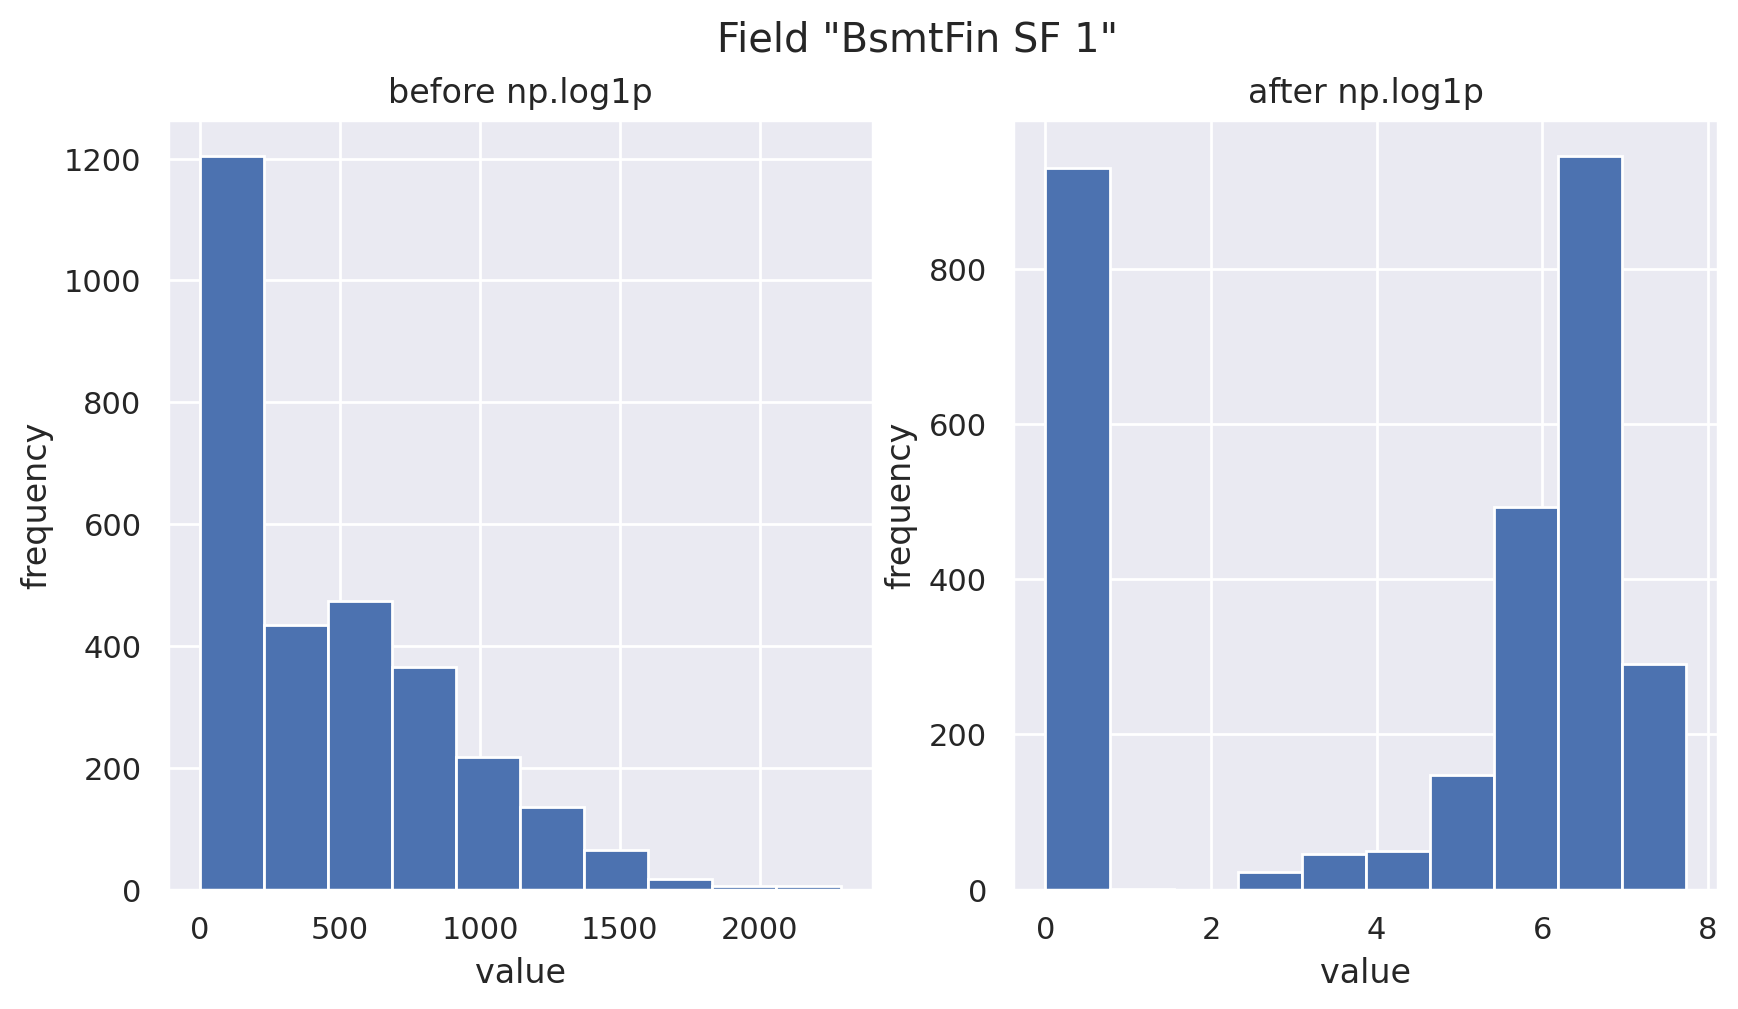

In [ ]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "BsmtFin SF 1"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df[field].hist(ax=ax_before)

# Apply a log transformation to this column
df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [ ]:
# Perform the skew transformation:

for col in skew_cols.index.values:
    if col == "SalePrice":
        continue
    df[col] = df[col].apply(np.log1p)

In [ ]:
# We now have a larger set of potentially-useful features
df.shape

(2926, 262)

In [ ]:
# There are a *lot* of variables. Let's go back to our saved original data and look at how many values are missing for each variable.
df = data
data.isnull().sum().sort_values()

Order                0
Sale Condition       0
Heating QC           0
Central Air          0
1st Flr SF           0
                  ... 
Fireplace Qu      1422
Fence             2355
Alley             2728
Misc Feature      2821
Pool QC           2915
Length: 82, dtype: int64

 Let's pick out just a few numeric columns to illustrate basic feature transformations.


In [ ]:
smaller_df= df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond',
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area',
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces',
                      'Garage Cars','SalePrice']]

In [ ]:
# Now we can look at summary statistics of the subset data
smaller_df.describe().T

count           mean           std      min       25%  \
Lot Area        2926.0   10110.988380   7790.971797   1300.0    7438.5   
Overall Qual    2926.0       6.088175      1.402714      1.0       5.0   
Overall Cond    2926.0       5.563568      1.112121      1.0       5.0   
Year Built      2926.0    1971.299043     30.238026   1872.0    1954.0   
Year Remod/Add  2926.0    1984.225906     20.863018   1950.0    1965.0   
Gr Liv Area     2926.0    1494.034176    486.199741    334.0    1126.0   
Full Bath       2926.0       1.564593      0.551390      0.0       1.0   
Bedroom AbvGr   2926.0       2.853725      0.827600      0.0       2.0   
Fireplaces      2926.0       0.597403      0.645759      0.0       0.0   
Garage Cars     2925.0       1.765128      0.759717      0.0       1.0   
SalePrice       2926.0  180423.395762  78544.030820  12789.0  129500.0   

                     50%        75%       max  
Lot Area          9429.0   11518.75  215245.0  
Overall Qual         6.0       7.00      10.0  
Overall Cond         5.0       6.00       9.0  
Year Built        1973.0    2000.75    2010.0  
Year Remod/Add    1993.0    2004.00    2010.0  
Gr Liv Area       1441.5    1740.00    3820.0  
Full Bath            2.0       2.00       4.0  
Bedroom AbvGr        3.0       3.00       8.0  
Fireplaces           1.0       1.00       4.0  
Garage Cars          2.0       2.00       5.0  
SalePrice       160000.0  213500.00  625000.0

In [ ]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2926 entries, 0 to 2930
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2926 non-null   int64  
 1   Overall Qual    2926 non-null   int64  
 2   Overall Cond    2926 non-null   int64  
 3   Year Built      2926 non-null   int64  
 4   Year Remod/Add  2926 non-null   int64  
 5   Gr Liv Area     2926 non-null   int64  
 6   Full Bath       2926 non-null   int64  
 7   Bedroom AbvGr   2926 non-null   int64  
 8   Fireplaces      2926 non-null   int64  
 9   Garage Cars     2925 non-null   float64
 10  SalePrice       2926 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 274.3 KB


In [ ]:
# There appears to be one NA in Garage Cars - we will take a simple approach and fill it with 0
smaller_df = smaller_df.fillna(0)

In [ ]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2926 entries, 0 to 2930
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2926 non-null   int64  
 1   Overall Qual    2926 non-null   int64  
 2   Overall Cond    2926 non-null   int64  
 3   Year Built      2926 non-null   int64  
 4   Year Remod/Add  2926 non-null   int64  
 5   Gr Liv Area     2926 non-null   int64  
 6   Full Bath       2926 non-null   int64  
 7   Bedroom AbvGr   2926 non-null   int64  
 8   Fireplaces      2926 non-null   int64  
 9   Garage Cars     2926 non-null   float64
 10  SalePrice       2926 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 274.3 KB



### Pair plot of features
Now that we have a nice, filtered dataset, let's generate visuals to better understand the target and feature-target relationships: pairplot is great for this!


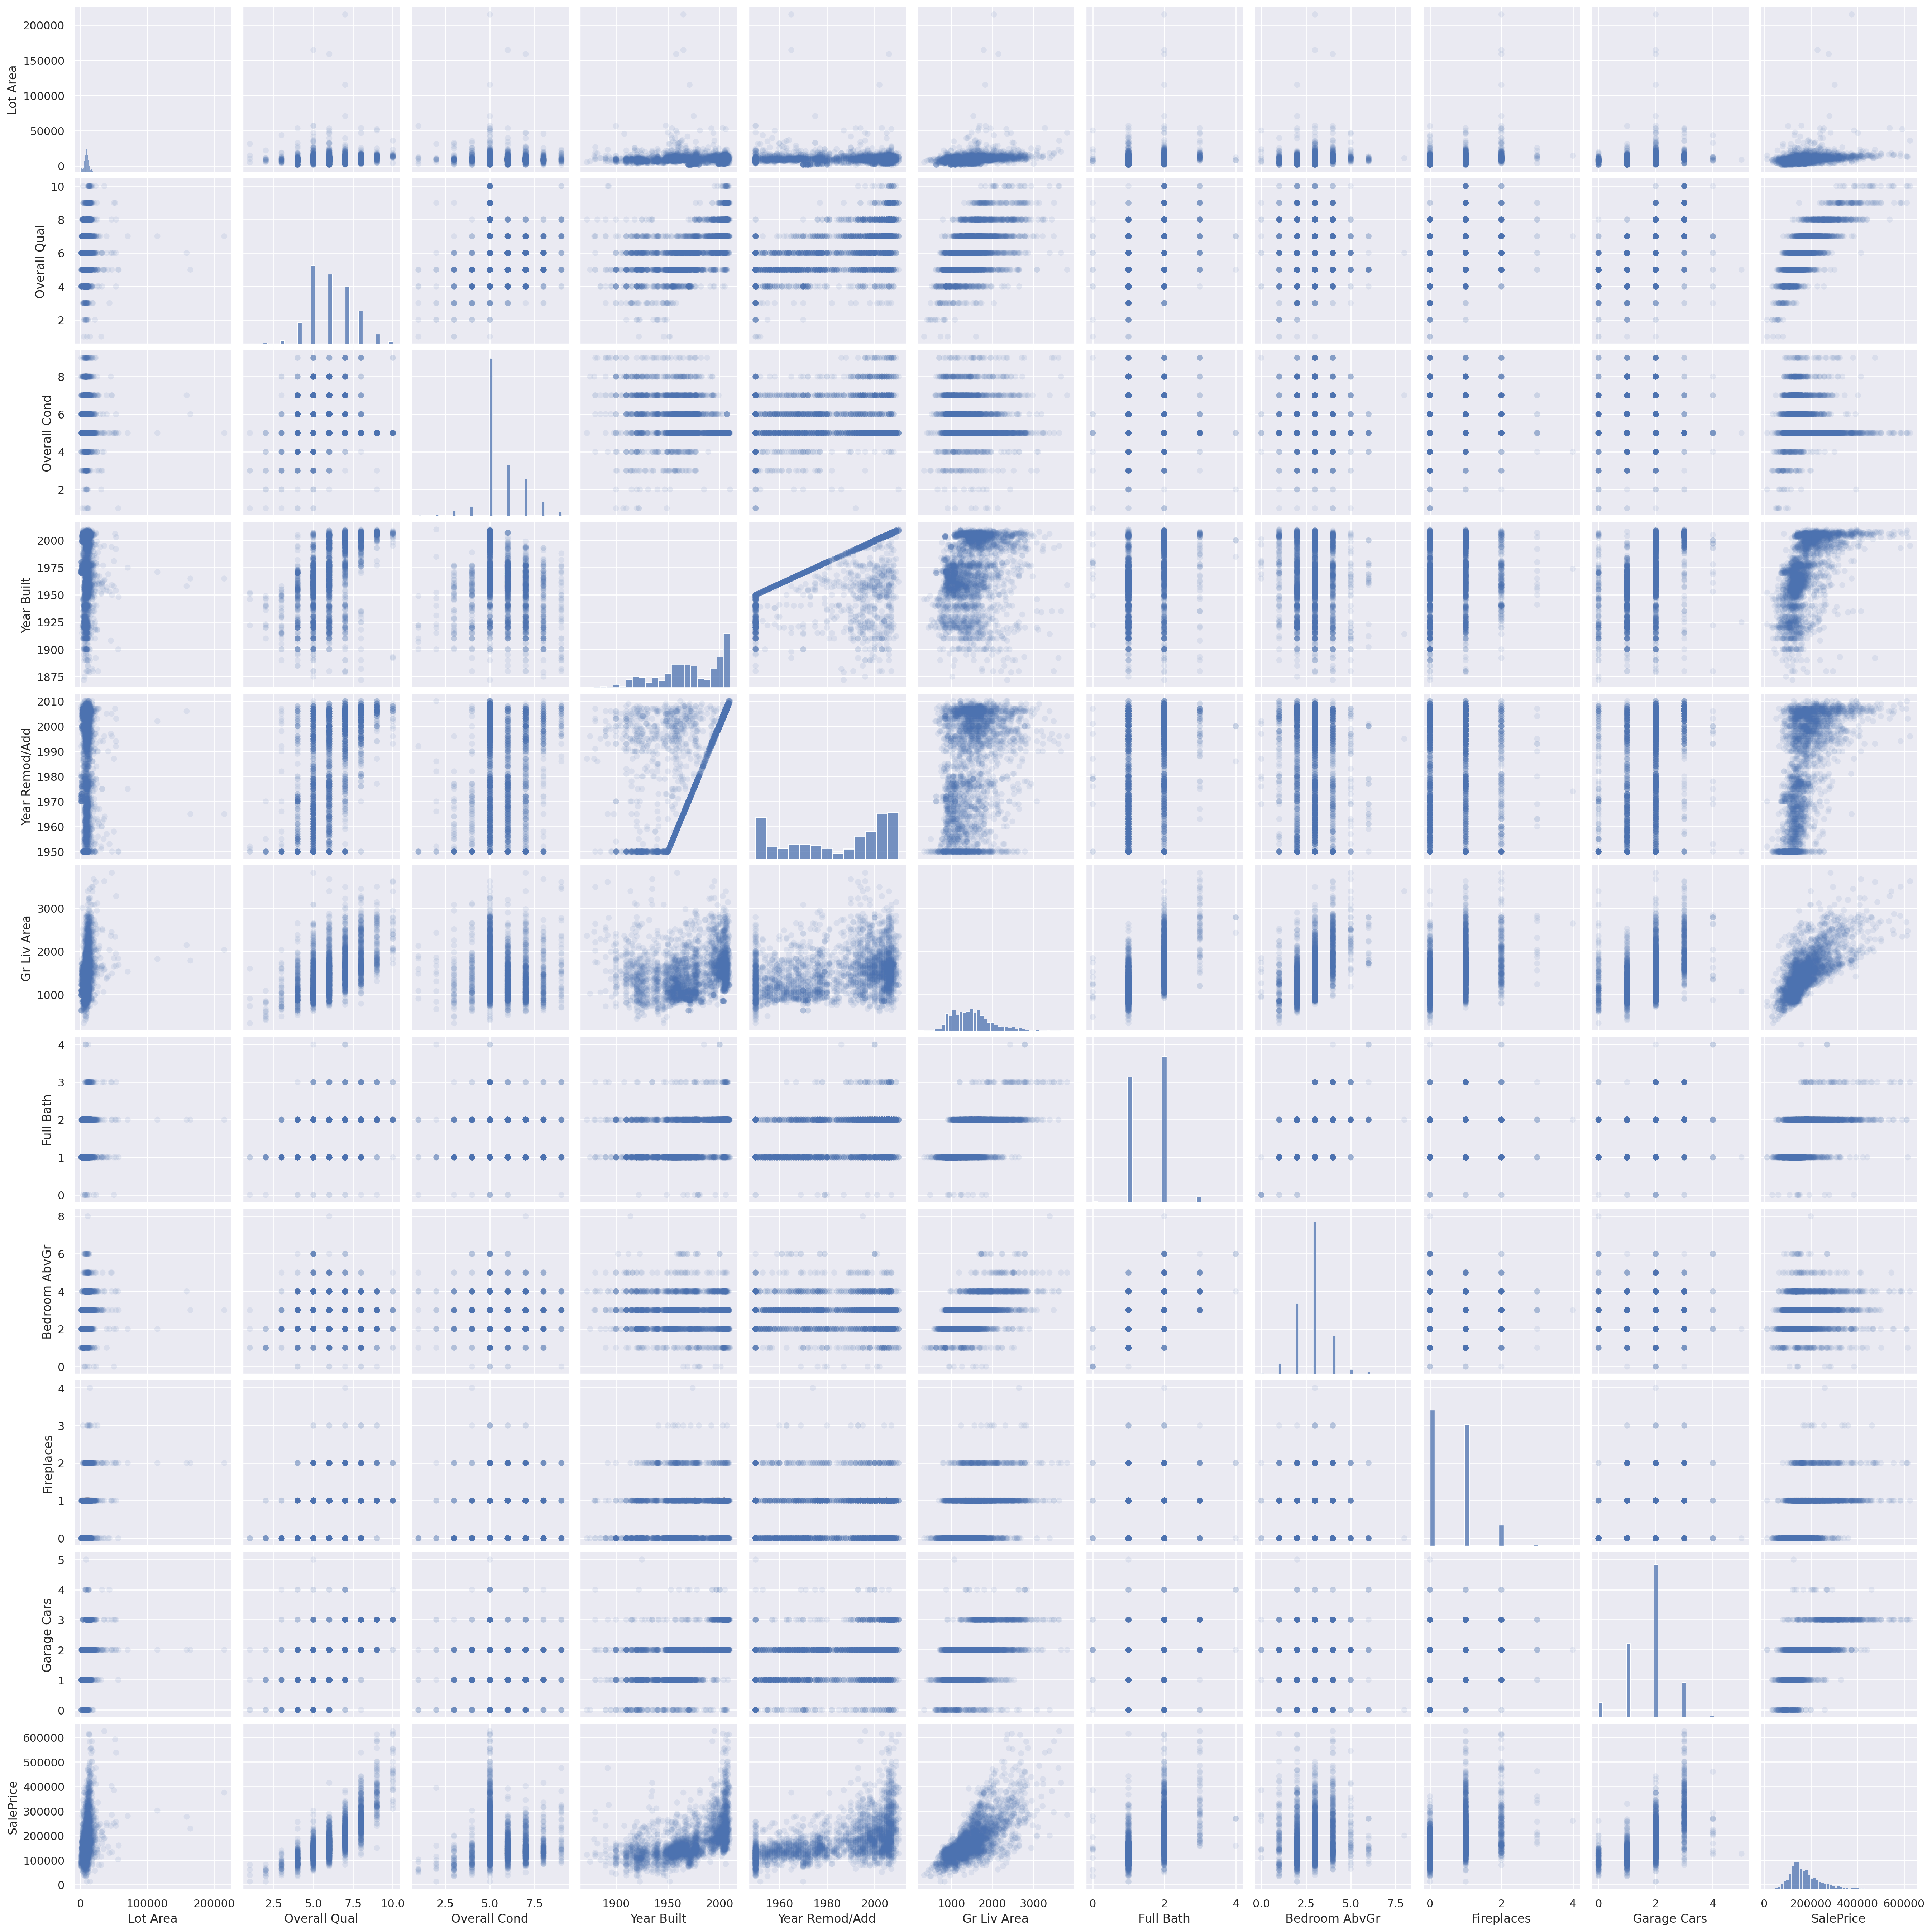

In [ ]:
sns.pairplot(smaller_df, plot_kws=dict(alpha=.1, edgecolor='none'))

#### Suppose our target variable is the SalePrice. We can set up separate variables for features and target.


In [ ]:
#Separate our features from our target

X = smaller_df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond',
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area',
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces',
                      'Garage Cars']]

y = smaller_df['SalePrice']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2926 entries, 0 to 2930
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2926 non-null   int64  
 1   Overall Qual    2926 non-null   int64  
 2   Overall Cond    2926 non-null   int64  
 3   Year Built      2926 non-null   int64  
 4   Year Remod/Add  2926 non-null   int64  
 5   Gr Liv Area     2926 non-null   int64  
 6   Full Bath       2926 non-null   int64  
 7   Bedroom AbvGr   2926 non-null   int64  
 8   Fireplaces      2926 non-null   int64  
 9   Garage Cars     2926 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 251.5 KB


Now that we have feature/target data X, y ready to go, we're nearly ready to fit and evaluate a baseline model using our current feature set. We'll need to create a **train/validation split** before we fit and score the model.

Since we'll be repeatedly splitting X, y into the same train/val partitions and fitting/scoring new models as we update our feature set, we'll define a reusable function that completes all these steps, making our code/process more efficient going forward.


Great, let's go ahead and run this function on our baseline feature set and take some time to analyze the results.


### Basic feature engineering: adding polynomial and interaction terms


One of the first things that we looked for in the pairplot was evidence about the relationship between each feature and the target. In certain features like _'Overall Qual'_ and _'Gr Liv Qual'_, we notice an upward-curved relationship rather than a simple linear correspondence. This suggests that we should add quadratic **polynomial terms or transformations** for those features, allowing us to express that non-linear relationship while still using linear regression as our model.

Luckily, pandas makes it quite easy to quickly add those square terms as additional features to our original feature set. We'll do so and evaluate our model again below.

As we add to our baseline set of features, we'll create a copy of the latest benchmark so that we can continue to store our older feature sets.
### Polynomial Features


In [ ]:
X2 = X.copy()

X2['OQ2'] = X2['Overall Qual'] ** 2
X2['GLA2'] = X2['Gr Liv Area'] ** 2


As is, each feature is treated as an independent quantity. However, there may be **interaction effects**, in which the impact of one feature may dependent on the current value of a different feature.

For example, there may be a higher premium for increasing _'Overall Qual'_ for houses that were built more recently. If such a premium or a similar effect exists, a feature that multiplies _'Overall Qual'_ by _'Year Built'_ can help us capture it.

Another style of interaction term involves feature proprtions: for example, to get at something like quality per square foot we could divide _'Overall Qual'_ by _'Lot Area'_.

Let's try adding both of these interaction terms and see how they impact the model results.

### Feature interactions


In [ ]:
X3 = X2.copy()

# multiplicative interaction
X3['OQ_x_YB'] = X3['Overall Qual'] * X3['Year Built']

# division interaction
X3['OQ_/_LA'] = X3['Overall Qual'] / X3['Lot Area']



### Categories and features derived from category aggregates


Incorporating **categorical features** into linear regression models is fairly straightforward: we can create a new feature column for each category value, and fill these columns with 1s and 0s to indicate which category is present for each row. This method is called **dummy variables** or **one-hot-encoding**.

We'll first explore this using the _'House Style'_ feature from the original dataframe. Before going straight to dummy variables, it's a good idea to check category counts to make sure all categories have reasonable representation.


In [ ]:
data['House Style'].value_counts()

1Story    1481
2Story     869
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: House Style, dtype: int64

This looks ok, and here's a quick look at how dummy features actually appear:


In [ ]:
pd.get_dummies(df['House Style'], drop_first=True).head()

1.5Unf  1Story  2.5Fin  2.5Unf  2Story  SFoyer  SLvl
0       0       1       0       0       0       0     0
1       0       1       0       0       0       0     0
2       0       1       0       0       0       0     0
3       0       1       0       0       0       0     0
4       0       1       0       0       0       0     0

We can call `pd.get_dummies()` on our entire dataset to quickly get data with all the original features and dummy variable representation of any categorical features. Let's look at some variable values.


In [ ]:
nbh_counts = df.Neighborhood.value_counts()
nbh_counts

NAmes      444
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

For this category, let's map the few least-represented neighborhoods to an "other" category before adding the feature to our feature set and running a new benchmark.


In [ ]:
other_nbhs = list(nbh_counts[nbh_counts <= 8].index)

other_nbhs

['Greens', 'GrnHill', 'Landmrk']

In [ ]:
X4 = X3.copy()

X4['Neighborhood'] = df['Neighborhood'].replace(other_nbhs, 'Other')

X4.Neighborhood.value_counts()

NAmes      444
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Other       11
Blueste     10
Name: Neighborhood, dtype: int64